# **8.4 Aggregations**

**Name**: Calingo, Christian Lei

**Section**: CPE22S3

**Course**: Computational Thinking with Python

**Course Code**: CPE311



---



---



In [19]:
import numpy as np
import pandas as pd
weather = pd.read_csv('data/weather_by_station.csv', index_col='date', parse_dates=True)
weather

,datatype,station,value,station_name
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.00,"STAMFORD 4.2 S, CT US"
2018-01-01,PRCP,GHCND:US1NJBG0015,0.00,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0015,0.00,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0017,0.00,"GLEN ROCK 0.7 SSE, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0017,0.00,"GLEN ROCK 0.7 SSE, NJ US"
...,...,...,...,...
2018-12-31,WDF5,GHCND:USW00094789,130.00,"JFK INTERNATIONAL AIRPORT, NY US"
2018-12-31,WSF2,GHCND:USW00094789,9.80,"JFK INTERNATIONAL AIRPORT, NY US"
2018-12-31,WSF5,GHCND:USW00094789,12.50,"JFK INTERNATIONAL AIRPORT, NY US"


In [61]:
fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True).assign(
trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'med', 'high'])
)
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low
2018-01-04,184.90,186.21,184.10,184.33,13880896,low
2018-01-05,185.59,186.90,184.93,186.85,13574535,low
2018-01-08,187.20,188.90,186.33,188.28,17994726,low


**Before we dive into any calculations, let's make sure pandas won't put things in scientific notation. We will modify how floats are formatted for displaying. The format we will
apply is .2f , which will provide the float with 2 digits after the decimal point**

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# **Summarizing DataFrames**

**We learned about agg() in the dataframe operations notebook when we learned about window calculations; however, we can call this on the dataframe directly to
aggregate its contents into a single series**

In [21]:
fb.agg({
'open': np.mean,
'high': np.max,
'low': np.min,
'close': np.mean,
'volume': np.sum
})

open            171.45
high            218.62
low             123.02
close           171.51
volume   6949682394.00
dtype: float64

**We can use this to find the total snowfall and precipitation recorded in Central Park in 2018:**

In [22]:
weather.query(
'station == "GHCND:USW00094728"'
).pivot(columns='datatype', values='value')[['SNOW', 'PRCP']].sum()

datatype
SNOW   1007.00
PRCP   1665.30
dtype: float64

**This is equivalent to passing 'sum' to agg()**

In [7]:
weather.query(
'station == "GHCND:USW00094728"'
).pivot(columns='datatype', values='value')[['SNOW', 'PRCP']].agg('sum')

datatype
SNOW    844.00
PRCP   1233.50
dtype: float64

Trying the mean of the samee station (GHCND:USW00094728)

In [9]:
weather.query(
'station == "GHCND:USW00094728"'
).pivot(columns='datatype', values='value')[['SNOW', 'PRCP']].mean()

datatype
SNOW   3.00
PRCP   4.39
dtype: float64

In [10]:
weather.query(
'station == "GHCND:USW00094728"'
).pivot(columns='datatype', values='value')[['SNOW', 'PRCP']].agg('mean')

datatype
SNOW   3.00
PRCP   4.39
dtype: float64

**Note that we aren't limited to providing a single aggregation per column. We can pass a list, and we will get a dataframe back instead of a series. nan values are placed
where we don't have a calculation result to display:**

In [8]:
fb.agg({
'open': 'mean',
'high': ['min', 'max'],
'low': ['min', 'max'],
'close': 'mean'
})

,open,high,low,close
mean,171.45,NaN,NaN,171.51
min,NaN,129.74,123.02,NaN
max,NaN,218.62,214.27,NaN


# **Using groupby()**

**Often we won't want to aggregate on the entire dataframe, but on groups within it. For this purpose, we can run groupby() before the aggregation. If we group by thetrading_volume column, we will get a row for each of the values it takes on**

In [11]:
fb.groupby('trading_volume').mean()

,open,high,low,close,volume
trading_volume,,,,,
low,171.36,173.46,169.31,171.43,24547207.71
med,175.82,179.42,172.11,175.14,79072559.12
high,167.73,170.48,161.57,168.16,141924023.33


**After we run the groupby() , we can still select columns for aggregation**

In [12]:
fb.groupby('trading_volume')['close'].agg(['min', 'max', 'mean'])

,min,max,mean
trading_volume,,,
low,124.06,214.67,171.43
med,152.22,217.50,175.14
high,160.06,176.26,168.16


**We can still provide a dictionary specifying the aggregations to perform, but passing a list for a column will result in a hierarchical index for the columns**

In [13]:
fb_agg = fb.groupby('trading_volume').agg({
'open': 'mean',
'high': ['min', 'max'],
'low': ['min', 'max'],
'close': 'mean'
})
fb_agg

open   high           low         close
                 mean    min    max    min    max   mean
trading_volume                                          
low            171.36 129.74 216.20 123.02 212.60 171.43
med            175.82 162.85 218.62 150.75 214.27 175.14
high           167.73 161.10 180.13 149.02 173.75 168.16

**The hierarchical index in the columns looks like this:**

In [14]:
fb_agg.columns

MultiIndex([( 'open', 'mean'),
            ( 'high',  'min'),
            ( 'high',  'max'),
            (  'low',  'min'),
            (  'low',  'max'),
            ('close', 'mean')],
           )

**Using a list comprehension, we can join the levels (in a tuple) with an _ at each iteration**

In [15]:
fb_agg.columns = ['_'.join(col_agg) for col_agg in fb_agg.columns]
fb_agg.head()

,open_mean,high_min,high_max,low_min,low_max,close_mean
trading_volume,,,,,,
low,171.36,129.74,216.20,123.02,212.60,171.43
med,175.82,162.85,218.62,150.75,214.27,175.14
high,167.73,161.10,180.13,149.02,173.75,168.16


# **Grouper**

**We can group on datetimes despite them being in the index if we use a Grouper**

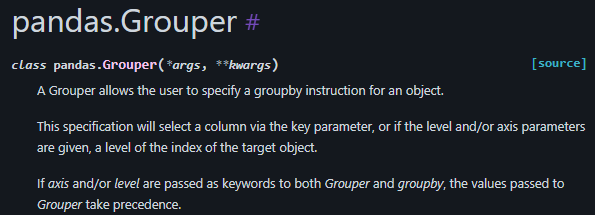

In [25]:
weather['2018-10'].query('datatype == "PRCP"').groupby(
    pd.Grouper(freq='D')).mean().head() #we used the grouper so that we can set the frequency by day

<ipython-input-25-834805f556c9>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  weather['2018-10'].query('datatype == "PRCP"').groupby(
<ipython-input-25-834805f556c9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.Grouper(freq='D')).mean().head() #we used the grouper so that we can set the frequency by day


,value
date,
2018-10-01,0.01
2018-10-02,2.23
2018-10-03,19.69
2018-10-04,0.32
2018-10-05,0.97


In [27]:
weather['2018'].query('datatype == "PRCP"').groupby(
    pd.Grouper(freq='M')).mean() #we can also change the frequency by month

<ipython-input-27-07128c8a9853>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  weather['2018'].query('datatype == "PRCP"').groupby(
<ipython-input-27-07128c8a9853>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.Grouper(freq='M')).mean() #we can also change the frequency by month


,value
date,
2018-01-31,2.22
2018-02-28,5.76
2018-03-31,4.71
2018-04-30,4.89
2018-05-31,3.68
2018-06-30,2.80
2018-07-31,5.51
2018-08-31,6.14
2018-09-30,6.83


**This Grouper can be one of many group by values. Here, we find the quarterly total precipitation per station**

In [28]:
weather.query('datatype == "PRCP"').groupby(
['station_name', pd.Grouper(freq='Q')]
).sum().unstack().sample(5, random_state=1)

<ipython-input-28-b1fc85a2870b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).sum().unstack().sample(5, random_state=1)


value                                 
date                        2018-03-31 2018-06-30 2018-09-30 2018-12-31
station_name                                                           
WANTAGH 1.1 NNE, NY US          279.90     216.80     472.50     277.20
STATEN ISLAND 1.4 SE, NY US     379.40     295.30     438.80     409.90
SYOSSET 2.0 SSW, NY US          323.50     263.30     355.50     459.90
STAMFORD 4.2 S, CT US           338.00     272.10     424.70     390.00
WAYNE TWP 0.8 SSW, NJ US        246.20     295.30     620.90     422.00

**Note that we can use filter() to exclude some groups from aggregation. Here, we only keep groups with 'NY' in the group's name attribute, which is the station ID in this case**

In [33]:
weather.groupby('station').filter( # station IDs with NY in them
lambda x: 'NY' in x.name
).query('datatype == "SNOW"').groupby('station_name').sum()

<ipython-input-33-51ac1ab83e74>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).query('datatype == "SNOW"').groupby('station_name').sum()


,value
station_name,
"ALBERTSON 0.2 SSE, NY US",1087.00
"AMITYVILLE 0.1 WSW, NY US",434.00
"AMITYVILLE 0.6 NNE, NY US",1072.00
"ARMONK 0.3 SE, NY US",1504.00
"BROOKLYN 3.1 NW, NY US",305.00
"CENTERPORT 0.9 SW, NY US",799.00
"ELMSFORD 0.8 SSW, NY US",863.00
"FLORAL PARK 0.4 W, NY US",1015.00
"HICKSVILLE 1.3 ENE, NY US",716.00


**Changing filter on the station to NJ and getting its PRCP**

In [32]:
weather.groupby('station').filter( # station IDs with NJ in them
lambda x: 'NJ' in x.name
).query('datatype == "PRCP"').groupby('station_name').sum()

<ipython-input-32-55fb9b81e270>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).query('datatype == "PRCP"').groupby('station_name').sum()


,value
station_name,
"BLOOMINGDALE 0.7 SSE, NJ US",1647.40
"BOONTON 0.6 NW, NJ US",1703.40
"BOONTON 0.7 WSW, NJ US",948.80
"CARTERET 0.6 WSW, NJ US",1672.40
"CEDAR GROVE TWP 0.4 W, NJ US",2052.30
"CHATHAM 0.6 NW, NJ US",1635.40
"CHATHAM TWP 1.1 NNW, NJ US",848.20
"CHATHAM TWP 2.0 NNW, NJ US",872.20
"COLTS NECK TWP 2.4 NW, NJ US",1428.60


**Let's see which months have the most precipitation. First, we need to group by day and average the precipitation across the stations. Then we can group by month and sum the resulting precipitation. We use nlargest() to give the 5 months with the most precipitation:**

In [34]:
weather.query('datatype == "PRCP"').groupby(
pd.Grouper(freq='D')
).mean().groupby(pd.Grouper(freq='M')).sum().value.nlargest()

<ipython-input-34-978bd538e3b2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).mean().groupby(pd.Grouper(freq='M')).sum().value.nlargest()


date
2018-11-30   210.59
2018-09-30   193.09
2018-08-31   192.45
2018-07-31   160.98
2018-02-28   158.11
Name: value, dtype: float64

**Perhaps the previous result was surprising. The saying goes "April showers bring May flowers"; yet April wasn't in the top 5 (neither was May for that matter). Snow will count towards precipitation, but that doesn't explain why summer months are higher than April. Let's look for days that accounted for a large percentage of the precipitation in a given month.**

**In order to do so, we need to calculate the average daily precipitation across stations and then find the total per month. This will be the denominator However, in order to divide the daily values by the total for their month, we will need a Series of equal dimensions. This means we will need to use transform()**

In [35]:
weather.query('datatype == "PRCP"').rename(
dict(value='prcp'), axis=1
).groupby(pd.Grouper(freq='D')).mean().groupby(
pd.Grouper(freq='M')
).transform(np.sum)['2018-01-28':'2018-02-03']

<ipython-input-35-951bb02e735d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).groupby(pd.Grouper(freq='D')).mean().groupby(


,prcp
date,
2018-01-28,69.31
2018-01-29,69.31
2018-01-30,69.31
2018-01-31,69.31
2018-02-01,158.11
2018-02-02,158.11
2018-02-03,158.11


**Notice how we have the same value repeated for each day in the month it belongs to. This will allow us to calculate the percentage of the monthly precipitation that occurred each day and then pull out the largest values**

In [36]:
weather\
.query('datatype == "PRCP"')\
.rename(dict(value='prcp'), axis=1)\
.groupby(pd.Grouper(freq='D')).mean()\
.assign(
total_prcp_in_month=lambda x: x.groupby(
pd.Grouper(freq='M')
).transform(np.sum),
pct_monthly_prcp=lambda x: x.prcp.div(
x.total_prcp_in_month
)
).nlargest(5, 'pct_monthly_prcp')

<ipython-input-36-e5da73b4d9c0>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .groupby(pd.Grouper(freq='D')).mean()\


,prcp,total_prcp_in_month,pct_monthly_prcp
date,,,
2018-10-12,34.77,105.63,0.33
2018-01-13,21.66,69.31,0.31
2018-03-02,38.77,137.46,0.28
2018-04-16,39.34,140.57,0.28
2018-04-17,37.30,140.57,0.27


**transform() can be used on dataframes as well. We can use it to easily standardize the data**

In [37]:
fb[['open', 'high', 'low', 'close']].transform(
lambda x: (x - x.mean()).div(x.std())
).head()

,open,high,low,close
date,,,,
2018-01-02,0.32,0.41,0.41,0.50
2018-01-03,0.53,0.57,0.60,0.66
2018-01-04,0.68,0.65,0.74,0.64
2018-01-05,0.72,0.68,0.78,0.77
2018-01-08,0.80,0.79,0.85,0.84


# **Pivot tables and crosstabs**

**We saw pivots in before; however, we weren't able to provide any aggregations. With pivot_table() , we get the mean by default as the aggfunc. In its simplest form, we provide a column to place along the columns:**

In [38]:
fb.pivot_table(columns='trading_volume')

trading_volume,low,med,high
close,171.43,175.14,168.16
high,173.46,179.42,170.48
low,169.31,172.11,161.57
open,171.36,175.82,167.73
volume,24547207.71,79072559.12,141924023.33


**By placing the trading volume in the index, we get the aggregation from the first example in the group by section above**

In [39]:
fb.pivot_table(index='trading_volume')

,close,high,low,open,volume
trading_volume,,,,,
low,171.43,173.46,169.31,171.36,24547207.71
med,175.14,179.42,172.11,175.82,79072559.12
high,168.16,170.48,161.57,167.73,141924023.33


**With pivot() , we also weren't able to handle multi-level indices or indices with repeated values. For this reason we haven't been able to put the weather data in the wide format. The pivot_table() method solves this issue**

In [40]:
weather.reset_index().pivot_table(
index=['date', 'station', 'station_name'],
columns='datatype',
values='value',
aggfunc='median'
).reset_index().tail()


datatype,date,station,station_name,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
28740,2018-12-31,GHCND:USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",5.00,NaN,NaN,2052.00,28.70,NaN,NaN,...,15.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28741,2018-12-31,GHCND:USW00094728,"NY CITY CENTRAL PARK, NY US",NaN,NaN,NaN,NaN,25.90,0.00,0.00,...,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28742,2018-12-31,GHCND:USW00094741,"TETERBORO AIRPORT, NJ US",1.70,NaN,NaN,1954.00,29.20,NaN,NaN,...,8.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28743,2018-12-31,GHCND:USW00094745,"WESTCHESTER CO AIRPORT, NY US",2.70,NaN,NaN,2212.00,24.40,NaN,NaN,...,11.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28744,2018-12-31,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",4.10,NaN,NaN,NaN,31.20,0.00,0.00,...,12.50,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Crosstab**

**We can use the pd.crosstab() function to create a frequency table. For example, if we want to see how many low-, medium-, and high-volume trading days Facebook stock had each month, we can use crosstab**

In [41]:
pd.crosstab(
index=fb.trading_volume,
columns=fb.index.month,
colnames=['month'] # name the columns index
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


The table above shows the number of low trading volumes in each month

If we count the number of low and med trading volume in the month of January, we can see the same counts

In [77]:
var = fb['trading_volume']
fb_low = fb.loc['2018-01-02':'2018-01-31'].value_counts(var == 'low')
fb_med = fb.loc['2018-01-02':'2018-01-31'].value_counts(var == 'med')
fb_high = fb.loc['2018-01-02':'2018-01-31'].value_counts(var == 'high')
print("Low in month of January")
print(fb_low) #returned 20 true and 1 false (20 are low, 1 is one)
print("Med in month of January")
print(fb_med) #returned 1 true and 20 false (1 is med, 20 are not)
print("High in month of January")
print(fb_high) #returned 21 false (none of the values were high)

Low in month of January
trading_volume
True     20
False     1
dtype: int64
Med in month of January
trading_volume
False    20
True      1
dtype: int64
High in month of January
trading_volume
False    21
dtype: int64


**We can normalize with the row or column totals with the normalize parameter. This shows percentage of the total**

In [80]:
pd.crosstab(
index=fb.trading_volume,
columns=fb.index.month,
colnames=['month'],
normalize='columns') # normilze shows the percentage of the total
                     # for the 1st month, if we manually compute, the 95% of 21 is 20 (rounded/truncated)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,0.95,1.00,0.71,0.95,1.00,1.00,0.86,1.00,1.00,1.00,1.00,1.00
med,0.05,0.00,0.19,0.05,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00
high,0.00,0.00,0.10,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00


**If we want to perform a calculation other than counting the frequency, we can pass the column to run the calculation on to values and the function to use to aggfunc**

In [81]:
pd.crosstab(
index=fb.trading_volume,
columns=fb.index.month,
colnames=['month'],
values=fb.close,  # this allows us to access the values under the close columns
aggfunc=np.mean # this calculates the mean of the close values depending on its trading_volume
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,185.24,180.27,177.07,163.29,182.93,195.27,201.92,177.49,164.38,154.19,141.64,137.16
med,179.37,NaN,164.76,174.16,NaN,NaN,194.28,NaN,NaN,NaN,NaN,NaN
high,NaN,NaN,164.11,NaN,NaN,NaN,176.26,NaN,NaN,NaN,NaN,NaN


**We can also get row and column subtotals with the margins parameter. Let's count the number of times each station recorded snow per month and include the subtotals:**

In [83]:
snow_data = weather.query('datatype == "SNOW"')
pd.crosstab(
index=snow_data.station_name,
columns=snow_data.index.month,
colnames=['month'],
             values=snow_data.value,
             aggfunc=lambda x: (x > 0).sum(),
             margins=True, # show row and column subtotals
             margins_name='total observations of snow' # name the subtotals
)

month,1,2,3,4,5,6,7,8,9,10,11,12,total observations of snow
station_name,,,,,,,,,,,,,
"ALBERTSON 0.2 SSE, NY US",3.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,9
"AMITYVILLE 0.1 WSW, NY US",1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3
"AMITYVILLE 0.6 NNE, NY US",3.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8
"ARMONK 0.3 SE, NY US",6.00,4.00,6.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,23
"BLOOMINGDALE 0.7 SSE, NJ US",2.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WESTFIELD 0.6 NE, NJ US",3.00,0.00,4.00,1.00,0.00,NaN,0.00,0.00,0.00,NaN,1.00,NaN,9
"WOODBRIDGE TWP 1.1 ESE, NJ US",4.00,1.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,11
"WOODBRIDGE TWP 1.1 NNE, NJ US",2.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,7


# **Conclusions**

In this activity, we learned how to use the Aggregate function in pandas. Using aggregations with dictionary, it allows us to perform multiple aggregations and the same time, we can compute the mean, max, min values at the same time. We also performed how to group values together using the groupby() and perform aggregations on it. This lesson is very crucial, because of this, we can fetch certain values in our dataframe and get their statistical values easily.